In [1]:
from utils import *
from IPython.display import clear_output
import matplotlib.pyplot as plt

In [9]:
imgs_4k = get_folder(callback=clear_output, num_img=2)
imgs_1080bc = get_folder(folder='./images/1080P/bicubic/', callback=clear_output, num_img=2)
imgs_720bc = get_folder(folder='./images/720P/bicubic/', callback=clear_output, num_img=2)

1 / 200


## DCT Explore

(2160, 3840)


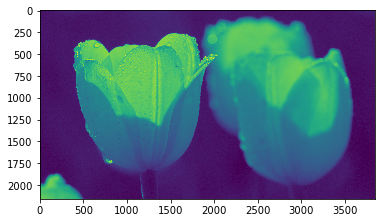

In [10]:
img = np.float32(imgs_4k[0, :, :, 0])
print(img.shape)
plt.imshow(img)

(2160, 3840)


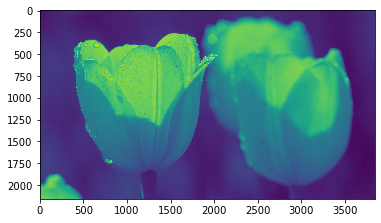

In [12]:
img = np.float32(imgs_4k[0, :, :, 1])
print(img.shape)
plt.imshow(img)

(2160, 3840)


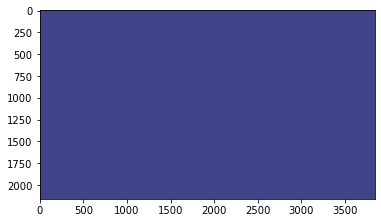

In [13]:
img_dct = cv2.dct(img)
print(img_dct.shape)
plt.imshow(img_dct)

In [6]:
def vis_hist(img, thresholds = (100, 1000, 10000), level=None, display=True):
    tmp = img.flatten()

    if thresholds is None:
        hst = plt.hist(tmp, bins=100)[0]
    else:
        num_plots = len(thresholds) + 1
        
        plt.figure(figsize=[12, 4 * ((num_plots + 1) // 2)])
        hsts = []
        
        for idx in range(num_plots):
            if level == idx:
                break
            plt.subplot((num_plots + 1) // 2, 2, idx + 1)
            if idx == 0:
                hst = plt.hist(tmp[abs(tmp) < thresholds[0]], bins=100)[0]
            elif idx == num_plots - 1:
                hst = plt.hist(tmp[abs(tmp) >= thresholds[idx - 1]], bins=100)[0]
            else:
                hst = plt.hist(tmp[(abs(tmp) >= thresholds[idx - 1]) & (abs(tmp) < thresholds[idx])], bins=100)
    if display:
        plt.show()

SyntaxError: invalid syntax (<ipython-input-6-4d6b4a9693c2>, line 21)

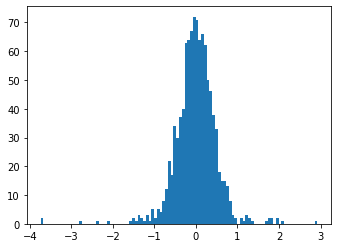

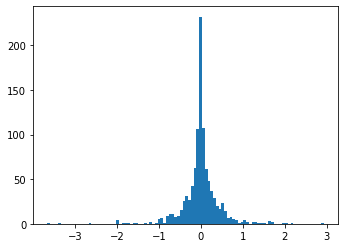

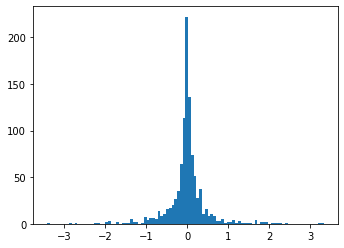

In [88]:
tile = 32
vis_hist(cv2.dct(np.float32(imgs_4k[10, :tile, :tile, 0])), (10,), 1)
vis_hist(cv2.dct(np.float32(imgs_1080bc[10, :tile, :tile, 0])), (10,), 1)
vis_hist(cv2.dct(np.float32(imgs_720bc[10, :tile, :tile, 0])), (10,), 1)

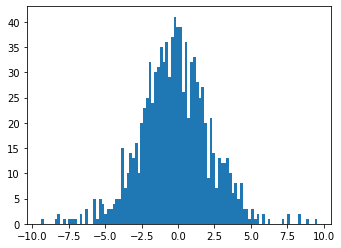

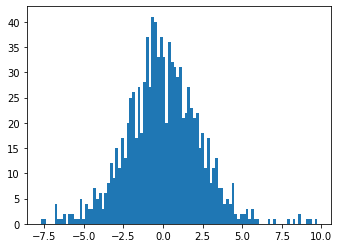

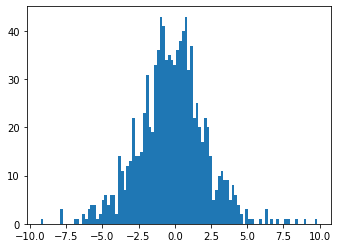

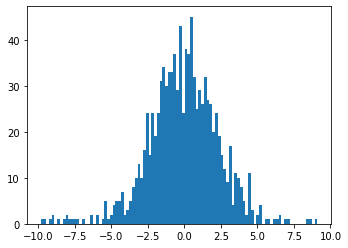

In [76]:
tile = 32
vis_hist(cv2.dct(np.float32(imgs_4k[0, tile*0:tile*1, tile*0:tile*1, 0])), (10,), 1)
vis_hist(cv2.dct(np.float32(imgs_4k[0, tile*1:tile*2, tile*1:tile*2, 0])), (10,), 1)
vis_hist(cv2.dct(np.float32(imgs_4k[0, tile*0:tile*1, tile*1:tile*2, 0])), (10,), 1)
vis_hist(cv2.dct(np.float32(imgs_4k[0, tile*1:tile*2, tile*0:tile*1, 0])), (10,), 1)

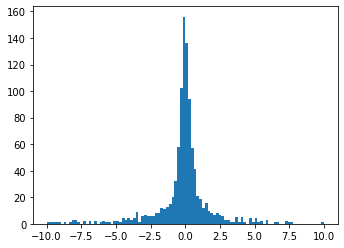

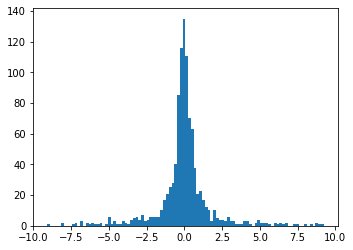

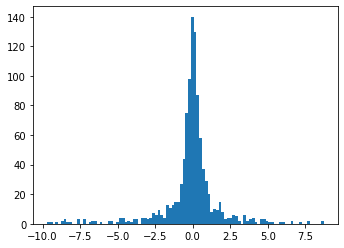

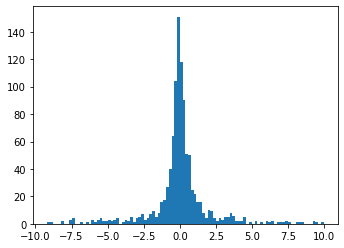

In [77]:
tile = 32
vis_hist(cv2.dct(np.float32(imgs_1080bc[0, tile*0:tile*1, tile*0:tile*1, 0])), (10,), 1)
vis_hist(cv2.dct(np.float32(imgs_1080bc[0, tile*1:tile*2, tile*1:tile*2, 0])), (10,), 1)
vis_hist(cv2.dct(np.float32(imgs_1080bc[0, tile*0:tile*1, tile*1:tile*2, 0])), (10,), 1)
vis_hist(cv2.dct(np.float32(imgs_1080bc[0, tile*1:tile*2, tile*0:tile*1, 0])), (10,), 1)

In [7]:
from DCT_Judger import *

In [11]:
dct_hist_union(imgs_4k[0, :, :, 0], 64)
plt.show()

KeyboardInterrupt: 

In [39]:
def vis_hist_all_tile(img, tile, n=10, bins=25, threshold=20, channel=0):
    plt.figure(figsize=(36, 24))
    n = min(img.shape[0] // tile, img.shape[1] // tile, n)
    stds = []
    for i in range(n):
        for j in range(n):
            plt.subplot(n, n, i*n+j+1)
            if len(img.shape) < 3:
#                 dct = cv2.dct(np.float32(img[tile*i:tile*(i+1), tile*j:tile*(j+1)])).flatten()
                dct = dct_tile(img, i, j, tile)
            else:
                dct = cv2.dct(np.float32(img[tile*i:tile*(i+1), tile*j:tile*(j+1), channel])).flatten()
            dct = dct[abs(dct) < threshold]
            stds.append(np.std(dct))
#             plt.hist(dct, bins=bins, range=(-threshold, threshold))
            plt.hist(dct, bins=bins, range=(-10, 10))
    return stds

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':


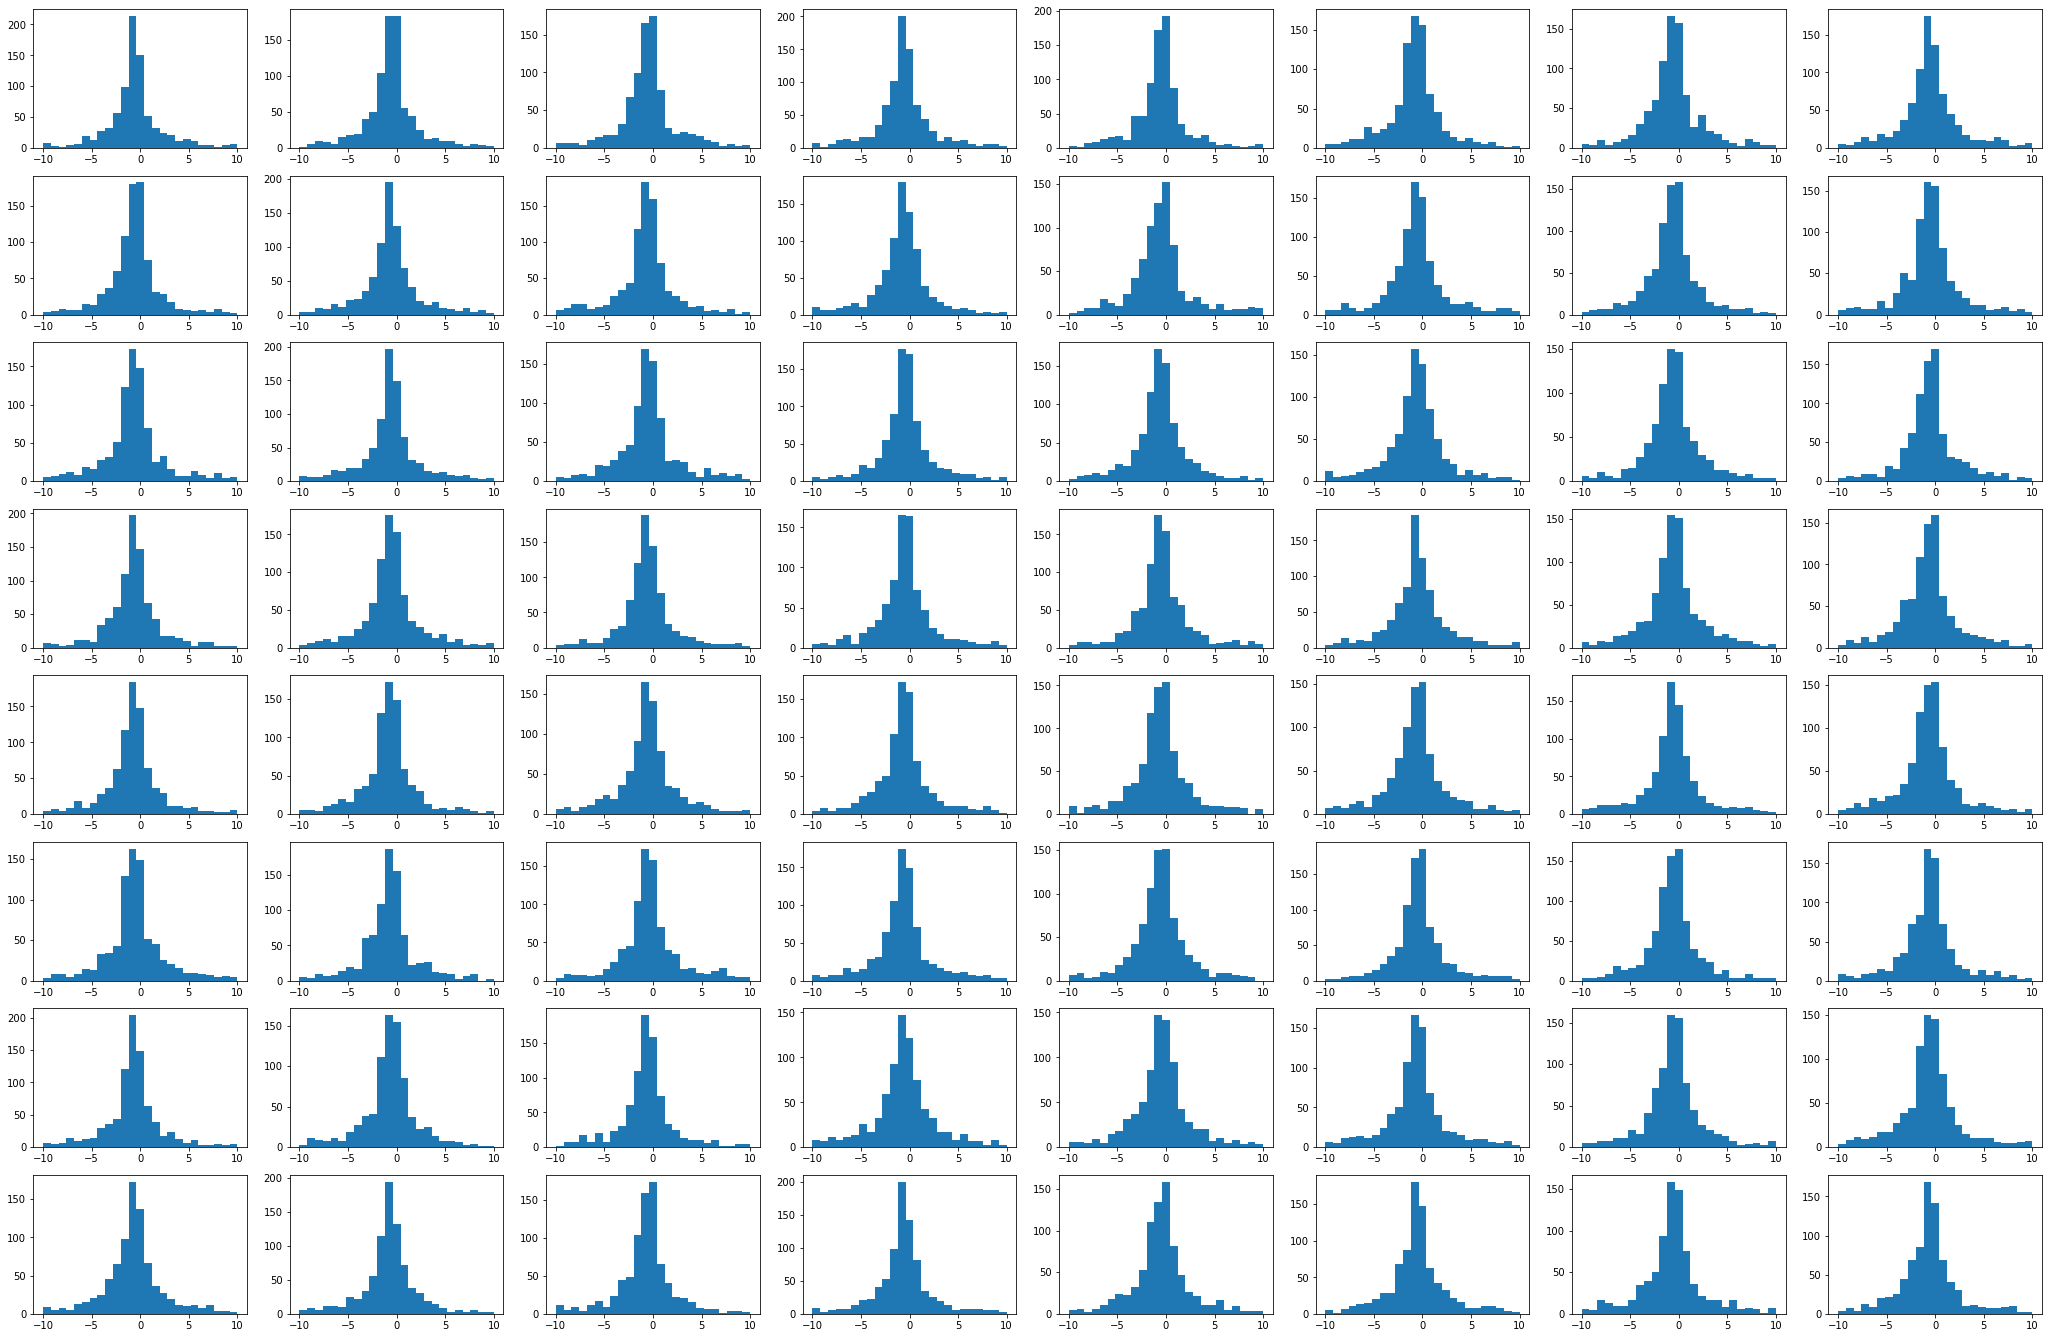

In [54]:
stds_4k = vis_hist_all_tile(imgs_4k[0, :, :, 0], 32, n=8)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in less
  from ipykernel import kernelapp as app


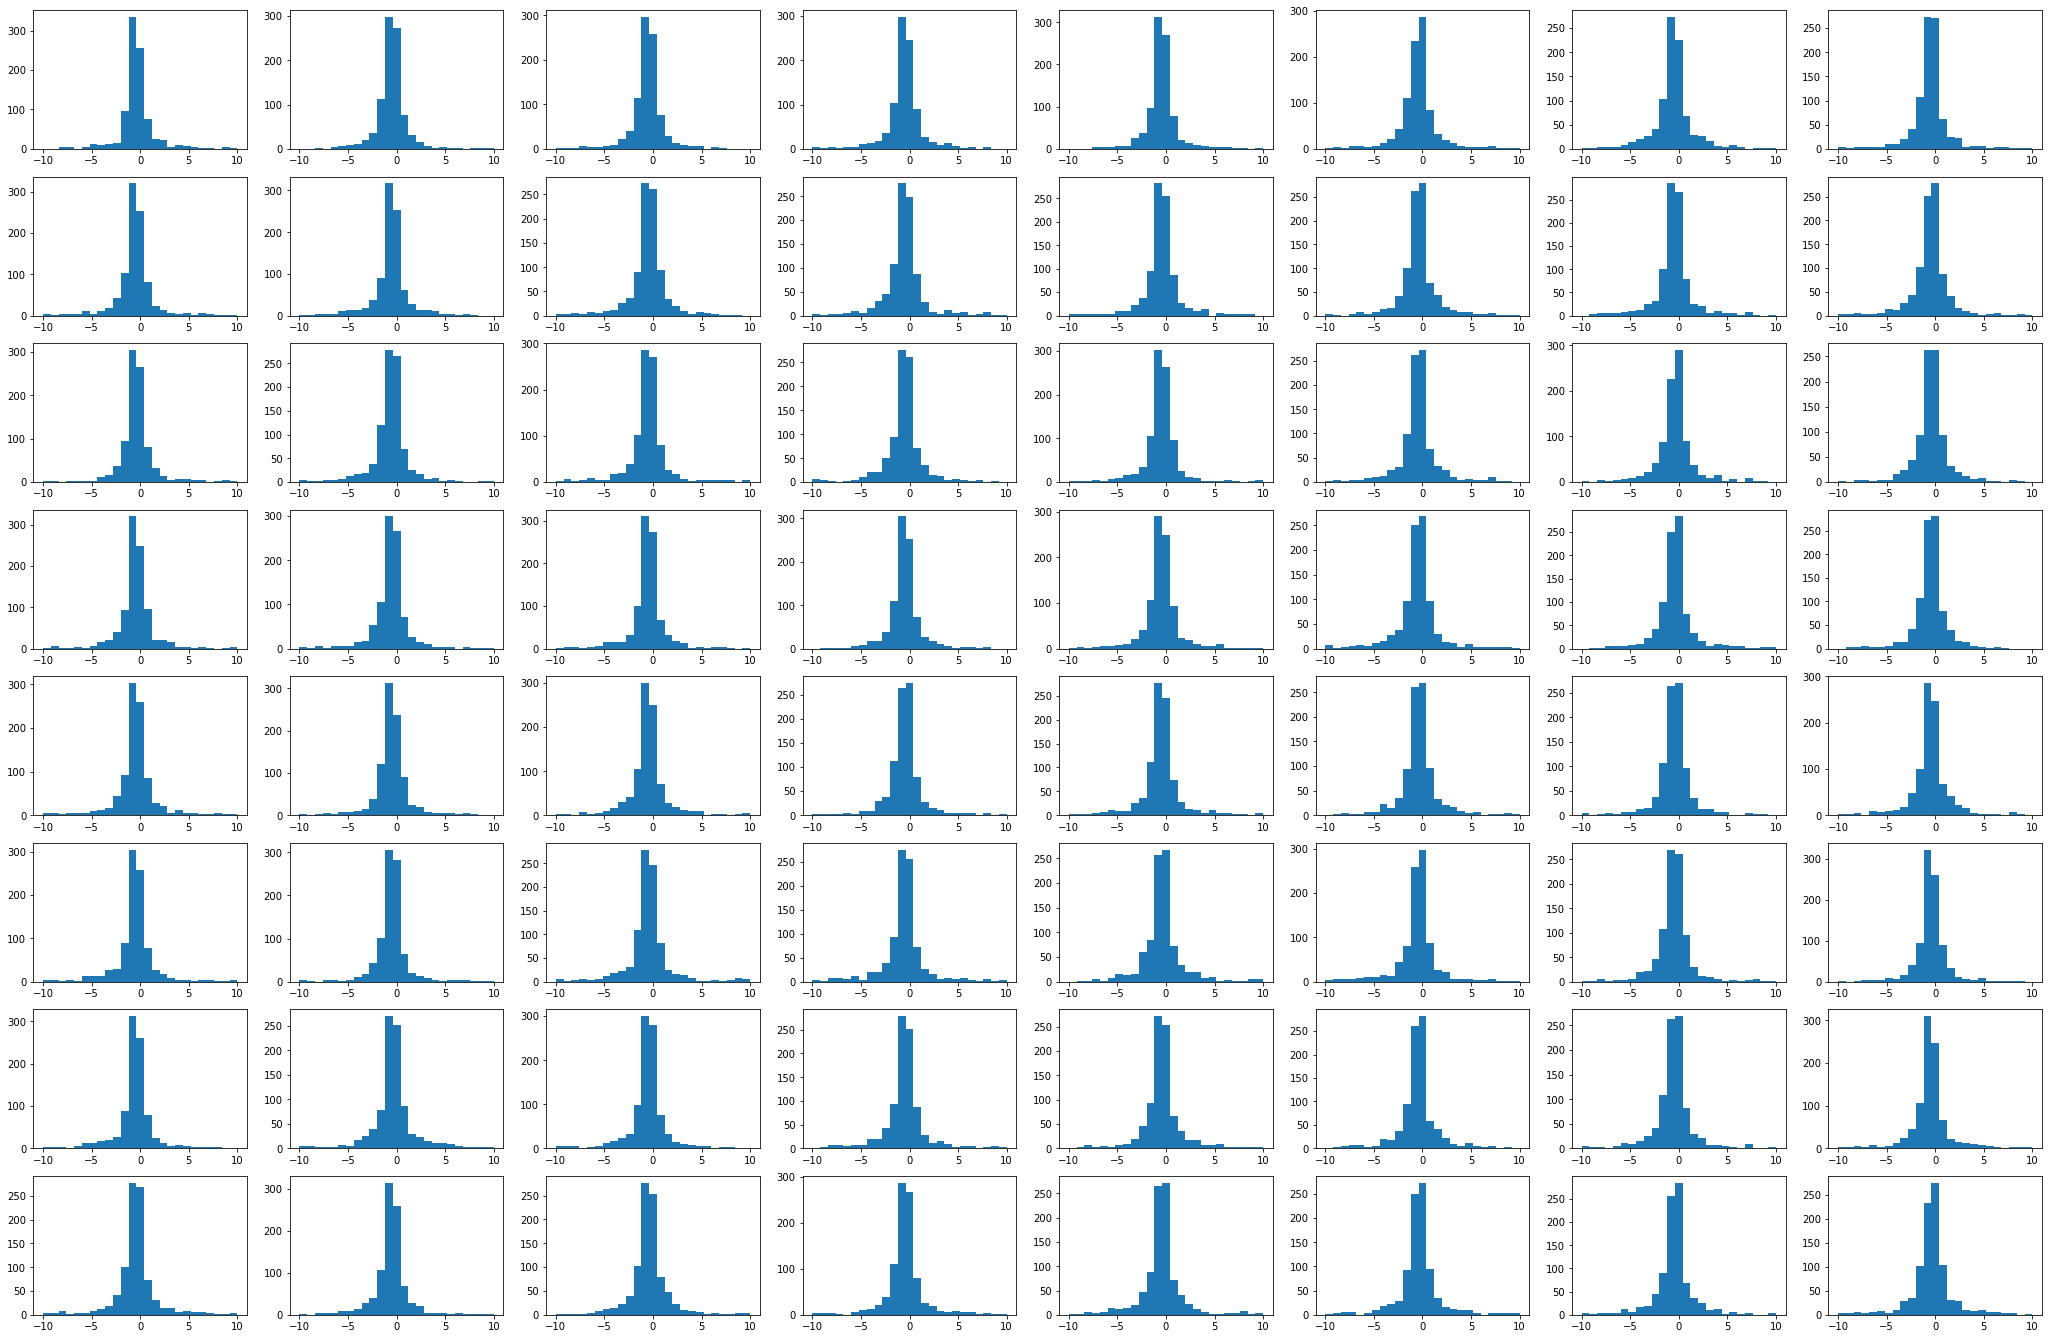

In [55]:
stds_1080 = vis_hist_all_tile(imgs_1080bc[0, :, :, 0], 32, n=8)

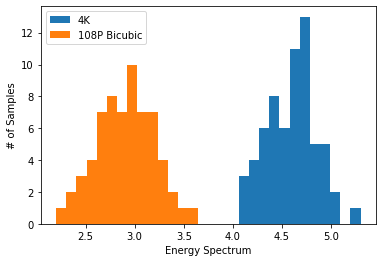

In [57]:
plt.show()
plt.figure()
plt.hist(stds_4k, bins=30, range=(2.2, 5.3), label='4K')
plt.hist(stds_1080, bins=30, range=(2.2, 5.3), label='108P Bicubic')
plt.xlabel('Energy Spectrum')
plt.ylabel('# of Samples')
plt.legend()

## With Reference

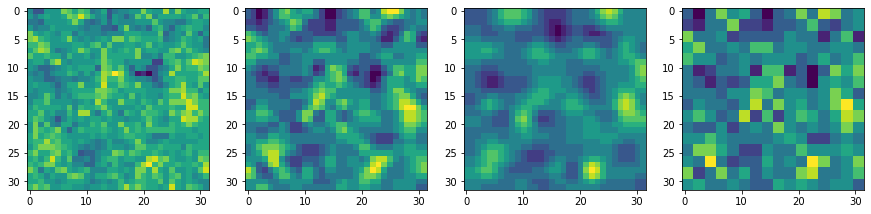

In [3]:
idx = 30

img_4k = imgs_4k[idx, :, :, 0]
img_1080bc = imgs_1080bc[idx, :, :, 0]
img_720bc = imgs_720bc[idx, :, :, 0]
img_ref = cv2.resize(down_sample(img_4k, 2), None, fx=2, fy=2, interpolation=cv2.INTER_AREA)

tile = 32
tile_4k = img_4k[:tile, :tile]
tile_1080bc = img_1080bc[:tile, :tile]
tile_720bc = img_720bc[:tile, :tile]
tile_ref = img_ref[:tile, :tile]

plt.figure(figsize=(15, 4))
plt.subplot(1, 4, 1)
plt.imshow(tile_4k)
plt.subplot(1, 4, 2)
plt.imshow(tile_1080bc)
plt.subplot(1, 4, 3)
plt.imshow(tile_720bc)
plt.subplot(1, 4, 4)
plt.imshow(tile_ref)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


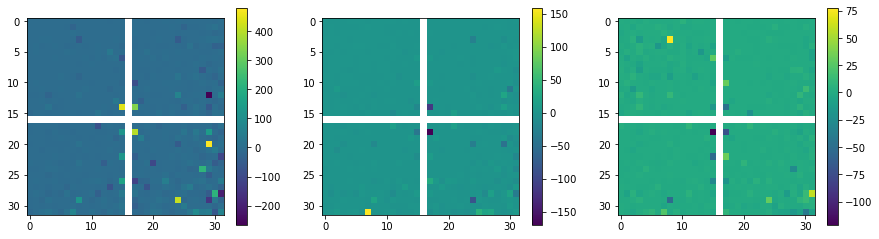

In [130]:
dct_ref = cv2.dct(np.float32(tile_ref))
dct_4k_rel = cv2.dct(np.float32(tile_4k)) / dct_ref
dct_1080bc_rel = cv2.dct(np.float32(tile_1080bc)) / dct_ref
dct_720bc_rel = cv2.dct(np.float32(tile_720bc)) / dct_ref
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
plt.imshow(dct_4k_rel)
plt.colorbar()
plt.subplot(1, 3, 2)
plt.imshow(dct_1080bc_rel)
plt.colorbar()
plt.subplot(1, 3, 3)
plt.imshow(dct_720bc_rel)
plt.colorbar()

(array([  1.,   3.,   3.,   7.,   2.,   8.,  12.,  14.,  11.,  24.,  89.,
        487., 134.,  53.,  23.,  15.,  11.,   9.,   8.,   5.,   2.,   0.,
          2.,   3.,   3.]),
 array([-8.114794  , -7.4140315 , -6.7132688 , -6.0125065 , -5.311744  ,
        -4.610982  , -3.9102194 , -3.209457  , -2.5086946 , -1.8079321 ,
        -1.1071697 , -0.40640733,  0.2943551 ,  0.9951175 ,  1.6958799 ,
         2.3966422 ,  3.0974047 ,  3.7981672 ,  4.4989295 ,  5.199692  ,
         5.9004545 ,  6.601217  ,  7.301979  ,  8.002742  ,  8.703504  ,
         9.404266  ], dtype=float32),
 <a list of 25 Patch objects>)

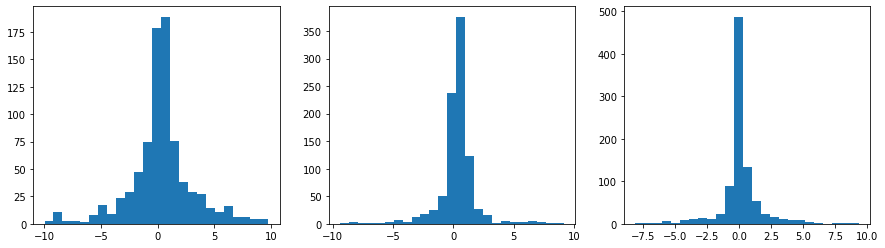

In [131]:
threshold = 10

plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
tmp = dct_4k_rel.flatten()
plt.hist(tmp[abs(tmp) < threshold], bins=25)
plt.subplot(1, 3, 2)
tmp = dct_1080bc_rel.flatten()
plt.hist(tmp[abs(tmp) < threshold], bins=25)
plt.subplot(1, 3, 3)
tmp = dct_720bc_rel.flatten()
plt.hist(tmp[abs(tmp) < threshold], bins=25)

### Self Reference

In [26]:
def dct_tile(img, i, j, tile, channel=0, rate=2, hist=False, threshold=20, bins=20, divide_ref=True):
    img = np.float32(img)
    if len(img.shape) < 3:
        img_tile = img[i*tile:(i+1)*tile, j*tile:(j+1)*tile]
    else:
        img_tile = img[i*tile:(i+1)*tile, j*tile:(j+1)*tile, channel]
    img_ref = cv2.resize(down_sample(img_tile, rate), dsize=img_tile.shape, interpolation=cv2.INTER_AREA)
    if divide_ref:
        tmp = cv2.dct(img_tile) / cv2.dct(img_ref) - 1
    else:
        tmp = (cv2.dct(img_tile), cv2.dct(img_ref))
#     if hist:
    if threshold is not None:
        tmp = tmp.flatten()
        tmp = tmp[abs(tmp) < threshold]
#         hst, _ = np.histogram(tmp, bins=bins, range=(-threshold, threshold))
#         return hst
#     else:
    return tmp

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':


(32, 32)
(32, 32)
(32, 32)


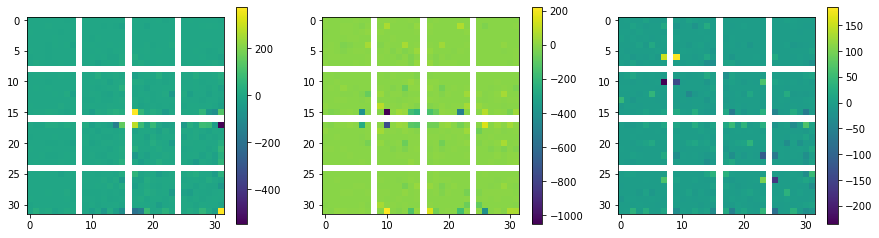

In [25]:
rate = 4

dct_4k_sref = dct_tile(img_4k, 0, 0, 32, rate=rate, threshold=None)
dct_1080bc_sref = dct_tile(img_1080bc, 0, 0, 32, rate=rate, threshold=None)
dct_720bc_sref = dct_tile(img_720bc, 0, 0, 32, rate=rate, threshold=None)

plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
plt.imshow(dct_4k_sref)
plt.colorbar()
plt.subplot(1, 3, 2)
plt.imshow(dct_1080bc_sref)
plt.colorbar()
plt.subplot(1, 3, 3)
plt.imshow(dct_720bc_sref)
plt.colorbar()

-0.5277837 5.4138355 5.439501163948552
-0.75859743 4.330928 4.396863096610131
-0.5191451 3.9019895 3.9363731103847557


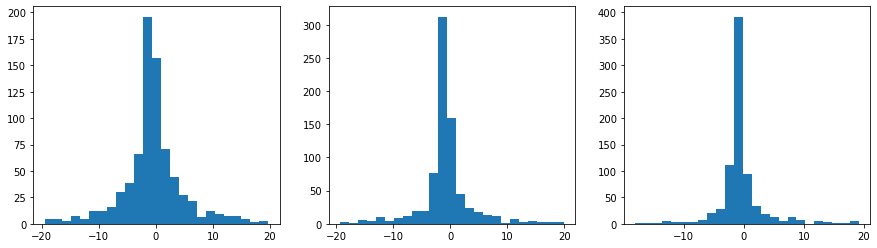

In [26]:
threshold = 20

plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
tmp = dct_4k_sref.flatten()
tmp = tmp[abs(tmp) < threshold]
plt.hist(tmp, bins=25)[0]
print(tmp.mean(), tmp.std(), (tmp**2).mean()**0.5)
plt.subplot(1, 3, 2)
tmp = dct_1080bc_sref.flatten()
tmp = tmp[abs(tmp) < threshold]
hst = plt.hist(tmp, bins=25)[0]
print(tmp.mean(), tmp.std(), (tmp**2).mean()**0.5)
plt.subplot(1, 3, 3)
tmp = dct_720bc_sref.flatten()
tmp = tmp[abs(tmp) < threshold]
hst = plt.hist(tmp, bins=25)[0]
print(tmp.mean(), tmp.std(), (tmp**2).mean()**0.5)

In [27]:
def self_ref_dct(img, tile, channel=0, rate=2, threshold=20, bins=20):
    if len(img.shape) > 3:
        img = img[:, :, channel]
    nx = img.shape[0] // tile
    ny = img.shape[1] // tile
#     hsts = []
    dcts = []
    for i in range(nx - 1):
        for j in range(ny - 1):
#             hst = self_ref_dct_tile(img[:, :], i, j, tile, rate=rate, hist=True, threshold=threshold, bins=bins)
            dct = dct_tile(img[:, :], i, j, tile, rate=rate, threshold=threshold)
            dcts.append(dct)
#     return np.array(hsts)
    return np.array(dcts)

### Mistakenly Calculate Features using Histogram

In [187]:
print('4k')
dct_4k_hst_com = self_ref_dct(img_4k, 32)
print('1080bc')
dct_1080bc_hst_com = self_ref_dct(img_1080bc, 32)
print('720bc')
dct_720bc_hst_com = self_ref_dct(img_720bc, 32)

4k


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in less
  # Remove the CWD from sys.path while we load stuff.


1080bc
720bc


(array([5.400e+01, 6.170e+02, 2.164e+03, 2.699e+03, 1.701e+03, 4.840e+02,
        1.080e+02, 2.000e+01, 5.000e+00, 2.000e+00]),
 array([278. , 297.7, 317.4, 337.1, 356.8, 376.5, 396.2, 415.9, 435.6,
        455.3, 475. ]),
 <a list of 10 Patch objects>)

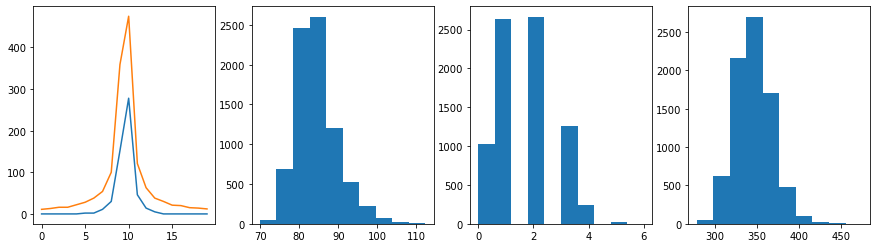

In [225]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 4, 1)
# plt.hist(abs(dct_4k_hst_com).mean(axis=1))
plt.plot(dct_4k_hst_com.min(axis=0))
plt.plot(dct_4k_hst_com.max(axis=0))
plt.subplot(1, 4, 2)
plt.hist(dct_4k_hst_com.std(axis=1))
plt.subplot(1, 4, 3)
plt.hist(abs(dct_4k_hst_com).min(axis=1))
plt.subplot(1, 4, 4)
plt.hist(abs(dct_4k_hst_com).max(axis=1))

(array([  14.,  295., 4127., 2560.,  296.,  157.,  109.,   79.,   48.,
         169.]),
 array([402. , 457.9, 513.8, 569.7, 625.6, 681.5, 737.4, 793.3, 849.2,
        905.1, 961. ]),
 <a list of 10 Patch objects>)

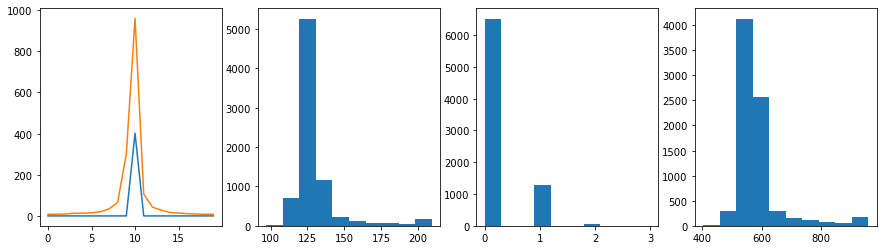

In [226]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 4, 1)
# plt.hist(abs(dct_1080bc_hst_com).mean(axis=1))
plt.plot(dct_1080bc_hst_com.min(axis=0))
plt.plot(dct_1080bc_hst_com.max(axis=0))
plt.subplot(1, 4, 2)
plt.hist(dct_1080bc_hst_com.std(axis=1))
plt.subplot(1, 4, 3)
plt.hist(abs(dct_1080bc_hst_com).min(axis=1))
plt.subplot(1, 4, 4)
plt.hist(abs(dct_1080bc_hst_com).max(axis=1))

(array([  13.,  128.,  527., 1342., 2075., 2251., 1170.,  286.,   54.,
           8.]),
 array([343. , 360.8, 378.6, 396.4, 414.2, 432. , 449.8, 467.6, 485.4,
        503.2, 521. ]),
 <a list of 10 Patch objects>)

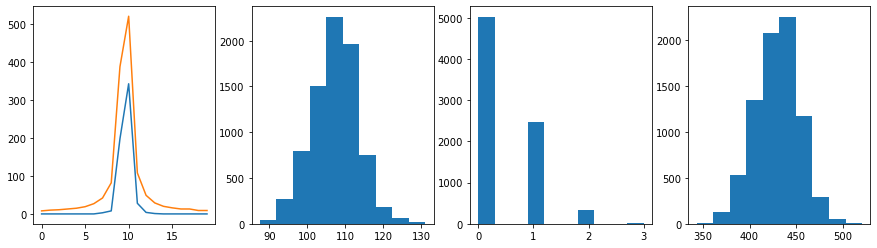

In [227]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 4, 1)
# plt.hist(abs(dct_720bc_hst_com).mean(axis=1))
plt.plot(dct_720bc_hst_com.min(axis=0))
plt.plot(dct_720bc_hst_com.max(axis=0))
plt.subplot(1, 4, 2)
plt.hist(dct_720bc_hst_com.std(axis=1))
plt.subplot(1, 4, 3)
plt.hist(abs(dct_720bc_hst_com).min(axis=1))
plt.subplot(1, 4, 4)
plt.hist(abs(dct_720bc_hst_com).max(axis=1))

### Corrected Calculation

In [239]:
print('4k')
dct_4k_dctt_com = dct_tile(img_4k, 32)
print('1080bc')
dct_1080bc_dctt_com = dct_tile(img_1080bc, 32)
print('720bc')
dct_720bc_dct_com = dct_tile(img_720bc, 32)

4k


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in less
  if sys.path[0] == '':


1080bc
720bc


(array([2.000e+00, 0.000e+00, 3.000e+00, 6.000e+00, 1.100e+01, 4.200e+01,
        1.530e+02, 4.730e+02, 1.665e+03, 5.499e+03]),
 array([16.01579 , 16.41421 , 16.81263 , 17.211048, 17.609467, 18.007885,
        18.406305, 18.804724, 19.203142, 19.601562, 19.99998 ],
       dtype=float32),
 <a list of 10 Patch objects>)

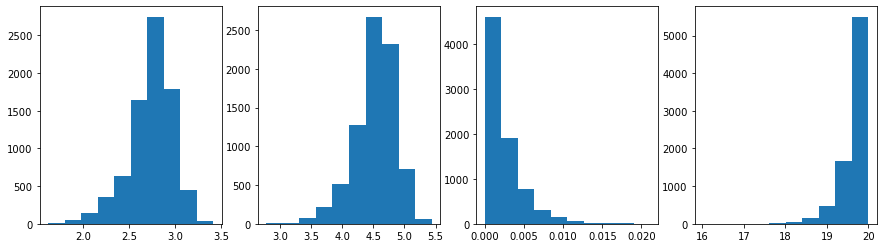

In [244]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 4, 1)
plt.hist([abs(e).mean() for e in dct_4k_dctt_com])
plt.subplot(1, 4, 2)
plt.hist([e.std() for e in dct_4k_dctt_com])
plt.subplot(1, 4, 3)
plt.hist([abs(e).min() for e in dct_4k_dctt_com])
plt.subplot(1, 4, 4)
plt.hist([abs(e).max() for e in dct_4k_dctt_com])

(array([1.660e+02, 0.000e+00, 1.000e+00, 2.000e+00, 8.000e+00, 6.000e+00,
        2.200e+01, 9.000e+01, 8.130e+02, 6.746e+03]),
 array([ 1.       ,  2.8999934,  4.799987 ,  6.69998  ,  8.599974 ,
        10.499967 , 12.39996  , 14.299953 , 16.199947 , 18.09994  ,
        19.999933 ], dtype=float32),
 <a list of 10 Patch objects>)

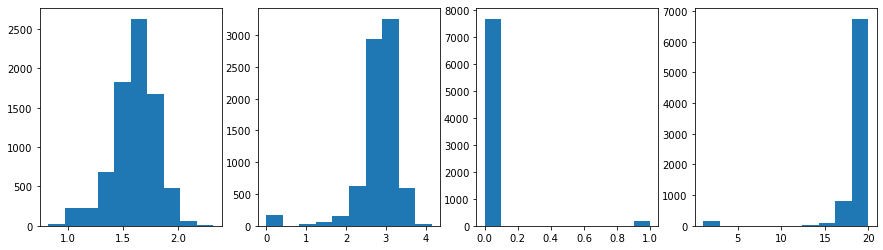

In [245]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 4, 1)
plt.hist([abs(e).mean() for e in dct_1080bc_dctt_com])
plt.subplot(1, 4, 2)
plt.hist([e.std() for e in dct_1080bc_dctt_com])
plt.subplot(1, 4, 3)
plt.hist([abs(e).min() for e in dct_1080bc_dctt_com])
plt.subplot(1, 4, 4)
plt.hist([abs(e).max() for e in dct_1080bc_dctt_com])

(array([1.000e+00, 1.000e+00, 3.000e+00, 1.000e+01, 3.300e+01, 9.800e+01,
        2.420e+02, 6.280e+02, 1.822e+03, 5.016e+03]),
 array([12.966695, 13.670014, 14.373335, 15.076654, 15.779974, 16.483294,
        17.186613, 17.889935, 18.593254, 19.296574, 19.999893],
       dtype=float32),
 <a list of 10 Patch objects>)

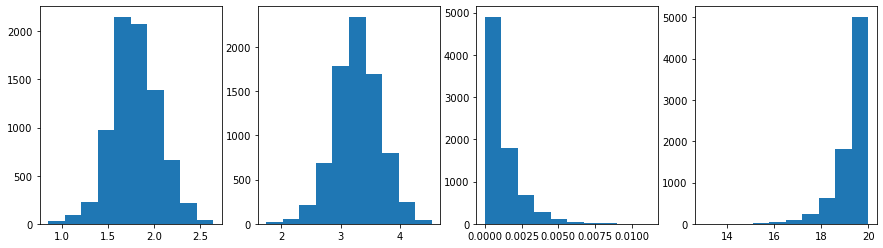

In [246]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 4, 1)
plt.hist([abs(e).mean() for e in dct_720bc_dct_com])
plt.subplot(1, 4, 2)
plt.hist([e.std() for e in dct_720bc_dct_com])
plt.subplot(1, 4, 3)
plt.hist([abs(e).min() for e in dct_720bc_dct_com])
plt.subplot(1, 4, 4)
plt.hist([abs(e).max() for e in dct_720bc_dct_com])

### Randomized DCT

In [54]:
def self_ref_rand(img, tile, samples=50, channel=0, rate=2, threshold=20, bins=20):
    if len(img.shape) > 3:
        img = img[:, :, channel]
    xs = list(range(img.shape[0] // tile))
    ys = list(range(img.shape[1] // tile))
    np.random.shuffle(xs)
    np.random.shuffle(ys)
    idxs = list(zip(xs, ys))[:samples]
    dcts = []
    for i, j in idxs:
        dct = dct_tile(img[:, :], i, j, tile, rate=rate, threshold=threshold) + 1
        dcts.append(dct)
    return np.array(dcts)

In [58]:
dct_4k_dct_rand = self_ref_rand(img_4k, 32)
dct_1080bc_dct_rand = self_ref_rand(img_1080bc, 32)
dct_720bc_dct_rand = self_ref_rand(img_720bc, 32)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in less
  from ipykernel import kernelapp as app


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice.
  after removing the cwd from sys.path.


ValueError: zero-size array to reduction operation minimum which has no identity

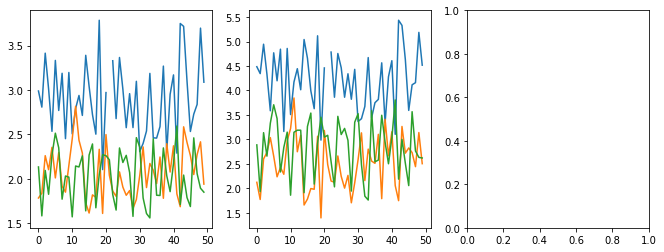

In [59]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 4, 1)
plt.plot([abs(e).mean() for e in dct_4k_dct_rand], label='4k')
plt.plot([abs(e).mean() for e in dct_1080bc_dct_rand], label='1080p')
plt.plot([abs(e).mean() for e in dct_720bc_dct_rand], label='720p')
plt.subplot(1, 4, 2)
plt.plot([e.std() for e in dct_4k_dct_rand], label='4k')
plt.plot([e.std() for e in dct_1080bc_dct_rand], label='1080p')
plt.plot([e.std() for e in dct_720bc_dct_rand], label='720p')
plt.subplot(1, 4, 3)
plt.plot([abs(e).min() for e in dct_4k_dct_rand], label='4k')
plt.plot([abs(e).min() for e in dct_1080bc_dct_rand], label='1080p')
plt.plot([abs(e).min() for e in dct_720bc_dct_rand], label='720p')
plt.subplot(1, 4, 4)
plt.plot([abs(e).max() for e in dct_4k_dct_rand], label='4k')
plt.plot([abs(e).max() for e in dct_1080bc_dct_rand], label='1080p')
plt.plot([abs(e).max() for e in dct_720bc_dct_rand], label='720p')
plt.legend()

## Integreted

In [78]:
def dct_feature_extract(img, tile, channel=0, samples=50, ref_rate=2, theshold=20, div_dct=True):
    if len(img.shape) > 3:
        img = img[:, :, channel]
    
    xs = list(range(img.shape[0] // tile))
    ys = list(range(img.shape[1] // tile))
    np.random.shuffle(xs)
    np.random.shuffle(ys)
    idxs = list(zip(xs, ys))[:samples]
    
    abs_dev = lambda x: abs(x).mean()
    sqr_dev = lambda x: (x**2).mean()**0.5
    
    dcts = []
    abds = []
    stds = []
    for i, j in idxs:
        if div_dct:
            dct = dct_tile(img[:, :], i, j, tile, rate=ref_rate, threshold=None, divide_ref=div_dct).flatten() + 1
            dct = dct[abs(dct) < threshold]
            abd = abs_dev(dct)
            std = sqr_dev(dct)
        else:
            dct, ref = dct_tile(img[:, :], i, j, tile, rate=ref_rate, threshold=None, divide_ref=div_dct)
            abd = abs_dev(dct) / abs_dev(ref)
            std = sqr_dev(dct) / sqr_dev(ref)
        dcts.append(dct)
        abds.append(abd)
        stds.append(std)
    return np.array([np.nanmean(abds), np.nanmin(abds), np.nanmax(abds),
                np.nanmean(stds), np.nanmin(stds), np.nanmax(stds)]),\
          np.array(dcts), np.array(abds), np.array(stds)

In [79]:
# array([2.49309254, 1.82115197, 3.55010891, 4.24326847, 3.29884113,
#        5.4425576 ])
tmp, _, _, _ = dct_feature_extract(img_4k, 32, div_dct=True)
tmp

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in less


array([2.81210089, 2.15568018, 3.47022033, 4.27905469, 3.39043148,
       5.11599238])

In [80]:
# array([1.34516525, 0.84572971, 1.93729055, 2.53848041, 1.42773304,
#        3.51298661])
tmp, _, _, _ = dct_feature_extract(img_1080bc, 32, div_dct=True)
tmp

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in less
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: Mean of empty slice.
  # This is added back by InteractiveShellApp.init_path()
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: Mean of empty slice.
  if sys.path[0] == '':


array([2.05568361, 1.60085297, 2.7042315 , 2.91629501, 2.00068307,
       3.98551727])

In [81]:
# array([1.51041031, 0.88001382, 2.15997314, 2.92645428, 2.01108412,
#        3.8853566 ])
tmp, _, _, _ = dct_feature_extract(img_720bc, 32, div_dct=True)
tmp

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in less


array([2.05148864, 1.56164515, 2.53762698, 3.16596856, 2.20888562,
       3.98406   ])

## Feature Visualization

### Ref Rate 2

In [20]:
rate2_fname = 'tile_32_channel_0_samples_50_rate_2_threshold_20_div_True.txt'
data = {}
data['4k'] = np.loadtxt('images/4k/' + rate2_fname)
assert np.isnan(data['4k']).sum() == 0, "Missing data"
data['1080bl'] = np.loadtxt('images/1080P/bilinear/' + rate2_fname)
assert np.isnan(data['1080bl']).sum() == 0, "Missing data"
data['1080bc'] = np.loadtxt('images/1080P/bicubic/' + rate2_fname)
assert np.isnan(data['1080bc']).sum() == 0, "Missing data"
data['1080lc'] = np.loadtxt('images/1080P/lanczos2/' + rate2_fname)
assert np.isnan(data['1080lc']).sum() == 0, "Missing data"
data['720bl'] = np.loadtxt('images/720P/bilinear/' + rate2_fname)
assert np.isnan(data['720bl']).sum() == 0, "Missing data"
data['720bc'] = np.loadtxt('images/720P/bicubic/' + rate2_fname)
assert np.isnan(data['720bc']).sum() == 0, "Missing data"
data['720lc'] = np.loadtxt('images/720P/lanczos2/' + rate2_fname)
assert np.isnan(data['720lc']).sum() == 0, "Missing data"
print("Ref rate 2 result check pass")

pos_data = data['4k']
neg_data = np.concatenate([item for key, item in data.items() if key is not '4k'])
pos_data.shape, neg_data.shape

Ref rate 2 result check pass


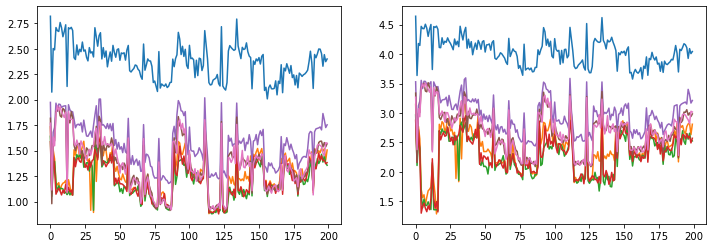

In [21]:
plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
for key in data.keys():
    tmp = data[key]
    plt.plot(tmp[:, 0], label=key)
# plt.legend()

plt.subplot(1, 2, 2)
for key in data.keys():
    tmp = data[key]
    plt.plot(tmp[:, 3], label=key)
# plt.legend()

In [25]:
stat = np.array([data['4k'].min(axis=0),
            data['1080bl'].max(axis=0), data['1080bc'].max(axis=0), data['1080lc'].max(axis=0),
            data['720bl'].max(axis=0), data['720bc'].max(axis=0), data['720lc'].max(axis=0)
            ])
stat

array([[2.0074749 , 1.25171912, 2.42359877, 3.5760295 , 2.39498872,
        4.16507535],
       [1.74380291, 1.35998249, 2.41740704, 3.14901905, 2.48117887,
        4.30730557],
       [1.64041185, 1.26714551, 2.35666847, 2.96756047, 2.16395012,
        4.07789909],
       [1.63628554, 1.19994462, 2.33924651, 2.95349355, 2.18878855,
        4.01758691],
       [2.0181849 , 1.37272871, 2.92747951, 3.59627265, 2.74917278,
        4.7280487 ],
       [1.92110515, 1.44110167, 2.63393474, 3.51525011, 2.7902045 ,
        4.53994884],
       [1.94264328, 1.30810261, 2.64634633, 3.5072764 , 2.48470635,
        4.57959648]])

In [29]:
thresholds = ((stat[0, 0] + stat[1:, 0].max()) / 2, (stat[0, 3] + stat[1:, 3].max()) / 2)
thresholds

(2.012829899787903, 3.586151076126429)

In [34]:
sum(pos_data[:, 0] > thresholds[0]), sum(pos_data[:, 3] > thresholds[1]), sum((pos_data[:, 0] > thresholds[0]) & (pos_data[:, 3] > thresholds[1]))

(199, 198, 198)

In [35]:
sum(neg_data[:, 0] <= thresholds[0]), sum(neg_data[:, 3] <= thresholds[1]), sum((neg_data[:, 0] <= thresholds[0]) & (neg_data[:, 3] <= thresholds[1]))

(1199, 1198, 1198)

### Ref Rate 4

In [36]:
rate2_fname = 'tile_32_channel_0_samples_50_rate_4_threshold_20_div_True.txt'
data = {}
data['4k'] = np.loadtxt('images/4k/' + rate2_fname)
assert np.isnan(data['4k']).sum() == 0, "Missing data"
data['1080bl'] = np.loadtxt('images/1080P/bilinear/' + rate2_fname)
assert np.isnan(data['1080bl']).sum() == 0, "Missing data"
data['1080bc'] = np.loadtxt('images/1080P/bicubic/' + rate2_fname)
assert np.isnan(data['1080bc']).sum() == 0, "Missing data"
data['1080lc'] = np.loadtxt('images/1080P/lanczos2/' + rate2_fname)
assert np.isnan(data['1080lc']).sum() == 0, "Missing data"
data['720bl'] = np.loadtxt('images/720P/bilinear/' + rate2_fname)
assert np.isnan(data['720bl']).sum() == 0, "Missing data"
data['720bc'] = np.loadtxt('images/720P/bicubic/' + rate2_fname)
assert np.isnan(data['720bc']).sum() == 0, "Missing data"
data['720lc'] = np.loadtxt('images/720P/lanczos2/' + rate2_fname)
assert np.isnan(data['720lc']).sum() == 0, "Missing data"
print("Ref rate 4 result check pass")

pos_data = data['4k']
neg_data = np.concatenate([item for key, item in data.items() if key is not '4k'])
pos_data.shape, neg_data.shape

Ref rate 4 result check pass


((200, 6), (1200, 6))

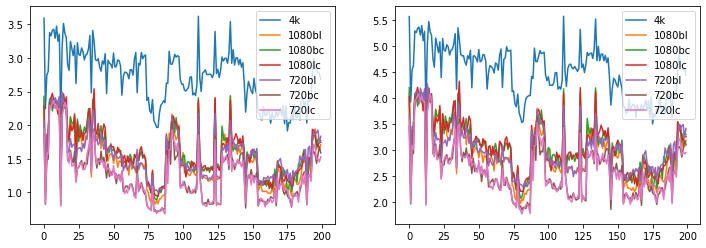

In [37]:
plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
for key in data.keys():
    tmp = data[key]
    plt.plot(tmp[:, 0], label=key)
plt.legend()

plt.subplot(1, 2, 2)
for key in data.keys():
    tmp = data[key]
    plt.plot(tmp[:, 3], label=key)
plt.legend()

In [38]:
stat = np.array([data['4k'].min(axis=0),
            data['1080bl'].max(axis=0), data['1080bc'].max(axis=0), data['1080lc'].max(axis=0),
            data['720bl'].max(axis=0), data['720bc'].max(axis=0), data['720lc'].max(axis=0)
            ])
stat

array([[1.91355586, 0.66904324, 2.60724521, 3.49914525, 1.        ,
        4.50430685],
       [2.42692542, 1.18183243, 3.77382898, 4.14614633, 2.58618071,
        5.9326962 ],
       [2.44317818, 1.35066235, 3.87604976, 4.19413541, 2.78114944,
        6.17420286],
       [2.54002237, 1.31056023, 4.20858431, 4.31952819, 2.84895017,
        6.5113983 ],
       [2.49027109, 1.35216296, 3.90591788, 4.27301385, 2.52722979,
        5.89630387],
       [2.3365221 , 1.07251465, 3.51988721, 4.04139556, 2.1354038 ,
        5.69269869],
       [2.36580086, 0.91423148, 4.57059765, 4.07527837, 2.18696359,
        6.68797372]])

In [39]:
thresholds = ((stat[0, 0] + stat[1:, 0].max()) / 2, (stat[0, 3] + stat[1:, 3].max()) / 2)
thresholds

(2.226789116859436, 3.9093367181873666)

In [40]:
sum(pos_data[:, 0] > thresholds[0]), sum(pos_data[:, 3] > thresholds[1]), sum((pos_data[:, 0] > thresholds[0]) & (pos_data[:, 3] > thresholds[1]))

(164, 164, 164)

In [41]:
sum(neg_data[:, 0] <= thresholds[0]), sum(neg_data[:, 3] <= thresholds[1]), sum((neg_data[:, 0] <= thresholds[0]) & (neg_data[:, 3] <= thresholds[1]))

(1114, 1120, 1113)

### Zero-Centered Ref Rate 2

In [9]:
rate2_fname = 'tile_32_channel_0_samples_50_rate_2_threshold_20_div_True_offset_1.0.txt'
data = {}
data['4k'] = np.loadtxt('images/4k/' + rate2_fname)
assert np.isnan(data['4k']).sum() == 0, "Missing data"
data['1080bl'] = np.loadtxt('images/1080P/bilinear/' + rate2_fname)
assert np.isnan(data['1080bl']).sum() == 0, "Missing data"
data['1080bc'] = np.loadtxt('images/1080P/bicubic/' + rate2_fname)
assert np.isnan(data['1080bc']).sum() == 0, "Missing data"
data['1080lc'] = np.loadtxt('images/1080P/lanczos2/' + rate2_fname)
assert np.isnan(data['1080lc']).sum() == 0, "Missing data"
data['720bl'] = np.loadtxt('images/720P/bilinear/' + rate2_fname)
assert np.isnan(data['720bl']).sum() == 0, "Missing data"
data['720bc'] = np.loadtxt('images/720P/bicubic/' + rate2_fname)
assert np.isnan(data['720bc']).sum() == 0, "Missing data"
data['720lc'] = np.loadtxt('images/720P/lanczos2/' + rate2_fname)
assert np.isnan(data['720lc']).sum() == 0, "Missing data"
print("Ref rate 2 result check pass")

pos_data = data['4k']
neg_data = np.concatenate([item for key, item in data.items() if key is not '4k'])
pos_data.shape, neg_data.shape

Ref rate 2 result check pass


((200, 6), (1200, 6))

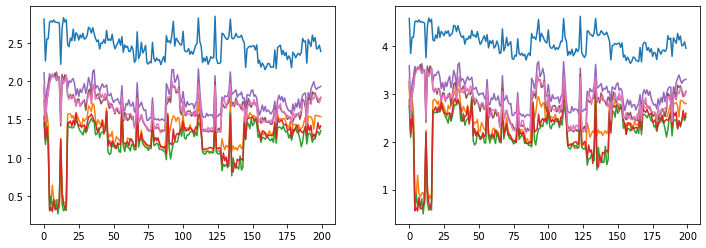

In [10]:
plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
for key in data.keys():
    tmp = data[key]
    plt.plot(tmp[:, 0], label=key)
# plt.legend()

plt.subplot(1, 2, 2)
for key in data.keys():
    tmp = data[key]
    plt.plot(tmp[:, 3], label=key)
# plt.legend()

In [11]:
stat = np.array([data['4k'].min(axis=0),
            data['1080bl'].max(axis=0), data['1080bc'].max(axis=0), data['1080lc'].max(axis=0),
            data['720bl'].max(axis=0), data['720bc'].max(axis=0), data['720lc'].max(axis=0)
            ])
stat

array([[2.14878821, 1.16003096, 2.5171845 , 3.63657483, 1.99379686,
        4.22845834],
       [1.74601221, 1.31490588, 2.29981732, 3.17633573, 2.35308657,
        4.12220693],
       [1.62945604, 1.22317088, 2.39570236, 2.96717454, 2.12476617,
        4.17633527],
       [1.6487608 , 1.21829295, 3.0517745 , 2.9549074 , 2.03319175,
        4.73766251],
       [2.16040015, 1.77134502, 3.88343644, 3.67551316, 2.93912445,
        5.72696916],
       [2.10623193, 1.61032927, 2.70216203, 3.61297439, 2.75265825,
        4.62104339],
       [2.09486914, 1.67326653, 3.4230063 , 3.56860979, 2.87634677,
        4.97630091]])

In [12]:
thresholds = ((stat[0, 0] + stat[1:, 0].max()) / 2, (stat[0, 3] + stat[1:, 3].max()) / 2)
thresholds

(2.1545941829681396, 3.656043997245576)

In [13]:
sum(pos_data[:, 0] > thresholds[0]), sum(pos_data[:, 3] > thresholds[1]), sum((pos_data[:, 0] > thresholds[0]) & (pos_data[:, 3] > thresholds[1]))

(199, 199, 199)

In [14]:
sum(neg_data[:, 0] <= thresholds[0]), sum(neg_data[:, 3] <= thresholds[1]), sum((neg_data[:, 0] <= thresholds[0]) & (neg_data[:, 3] <= thresholds[1]))

(1199, 1198, 1198)